# Bibliotecas

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import statsmodels.api as sm 
import yfinance as yf 
from datetime import datetime, timedelta
import pylab
from scipy import stats
import seaborn as sns

# Base de Dados

A base de dados para esse exercício foi extraído do site Our World in Data: 

Productivity: output per hour worked: https://ourworldindata.org/grapher/labor-productivity-per-hour-pennworldtable

Average years of schooling: https://ourworldindata.org/grapher/mean-years-of-schooling-long-run

In [2]:
#Extraíndo a base de dados com o Pandas

ensino_superior = pd.read_csv(r"C:\Users\emanu\Downloads\labor-productivity-per-hour-pennworldtable.csv")
produtividade_trabalho = pd.read_csv(r"C:\Users\emanu\Downloads\mean-years-of-schooling-long-run.csv")

In [3]:
#Anos que as pesquisas foram realizadas

ensino_superior['Year'].unique()

array([1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971], dtype=int64)

In [4]:
produtividade_trabalho['Year'].unique()

array([1870, 1875, 1880, 1885, 1890, 1895, 1900, 1905, 1910, 1915, 1920,
       1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975,
       1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], dtype=int64)

In [5]:
#Selecionado o ano mais recente comum a ambas as pesquisas

ensino_superior = ensino_superior[ensino_superior['Year'] == 2015]
ensino_superior

,Entity,Code,Year,Productivity: output per hour worked
43,Argentina,ARG,2015,26.997778
113,Australia,AUS,2015,56.053726
183,Austria,AUT,2015,62.702095
233,Bangladesh,BGD,2015,4.034060
303,Belgium,BEL,2015,66.488235
...,...,...,...,...
3188,Turkey,TUR,2015,41.479440
3258,United Kingdom,GBR,2015,53.376090
3328,United States,USA,2015,70.636710
3358,Uruguay,URY,2015,27.477356


In [6]:
produtividade_trabalho = produtividade_trabalho[produtividade_trabalho['Year'] == 2015]
produtividade_trabalho

,Entity,Code,Year,Combined - average years of education for 15-64 years male and female youth and adults
29,Afghanistan,AFG,2015,4.810000
60,Africa,NaN,2015,6.195438
91,Albania,ALB,2015,9.990000
122,Algeria,DZA,2015,7.550000
153,Argentina,ARG,2015,9.590000
...,...,...,...,...
3602,Vietnam,VNM,2015,7.990000
3633,World,OWID_WRL,2015,8.478127
3664,Yemen,YEM,2015,4.640000
3695,Zambia,ZMB,2015,7.900000


In [7]:
#Unindo ambas as bases de dados em uma só com base no código do país ('Code')

base_dados = pd.merge(ensino_superior, produtividade_trabalho, on='Code')
base_dados

,Entity_x,Code,Year_x,Productivity: output per hour worked,Entity_y,Year_y,Combined - average years of education for 15-64 years male and female youth and adults
0,Argentina,ARG,2015,26.997778,Argentina,2015,9.59
1,Australia,AUS,2015,56.053726,Australia,2015,12.92
2,Austria,AUT,2015,62.702095,Austria,2015,10.27
3,Bangladesh,BGD,2015,4.034060,Bangladesh,2015,6.76
4,Belgium,BEL,2015,66.488235,Belgium,2015,11.36
...,...,...,...,...,...,...,...
60,Turkey,TUR,2015,41.479440,Turkey,2015,8.13
61,United Kingdom,GBR,2015,53.376090,United Kingdom,2015,12.67
62,United States,USA,2015,70.636710,United States,2015,13.29
63,Uruguay,URY,2015,27.477356,Uruguay,2015,8.65


In [8]:
#Alterando o nome das colunas por conveniência

base_dados.rename(columns={'Productivity: output per hour worked': 'Produtividade',
                           'Combined - average years of education for 15-64 years male and female youth and adults': 'Anos de Estudo'},
                  inplace=True)

base_dados

,Entity_x,Code,Year_x,Produtividade,Entity_y,Year_y,Anos de Estudo
0,Argentina,ARG,2015,26.997778,Argentina,2015,9.59
1,Australia,AUS,2015,56.053726,Australia,2015,12.92
2,Austria,AUT,2015,62.702095,Austria,2015,10.27
3,Bangladesh,BGD,2015,4.034060,Bangladesh,2015,6.76
4,Belgium,BEL,2015,66.488235,Belgium,2015,11.36
...,...,...,...,...,...,...,...
60,Turkey,TUR,2015,41.479440,Turkey,2015,8.13
61,United Kingdom,GBR,2015,53.376090,United Kingdom,2015,12.67
62,United States,USA,2015,70.636710,United States,2015,13.29
63,Uruguay,URY,2015,27.477356,Uruguay,2015,8.65


In [9]:
#Selecionando os dados que serão utilizados na regressão

dados_regressao = base_dados[['Produtividade','Anos de Estudo']]
dados_regressao

,Produtividade,Anos de Estudo
0,26.997778,9.59
1,56.053726,12.92
2,62.702095,10.27
3,4.034060,6.76
4,66.488235,11.36
...,...,...
60,41.479440,8.13
61,53.376090,12.67
62,70.636710,13.29
63,27.477356,8.65


### Distribuição dos Dados

O gráfico de dispersão (scatter plot) fornece insights preliminares sobre a relação estatística entre as variáveis observadas.

Podemos calcular a correlação conforme fórmula abaixo: 

$
corr ( X, Y ) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2}}}
$

In [10]:
#Correlação entre os dados

correlacao = dados_regressao['Produtividade'].corr(dados_regressao['Anos de Estudo'])
round(correlacao,3)

0.712

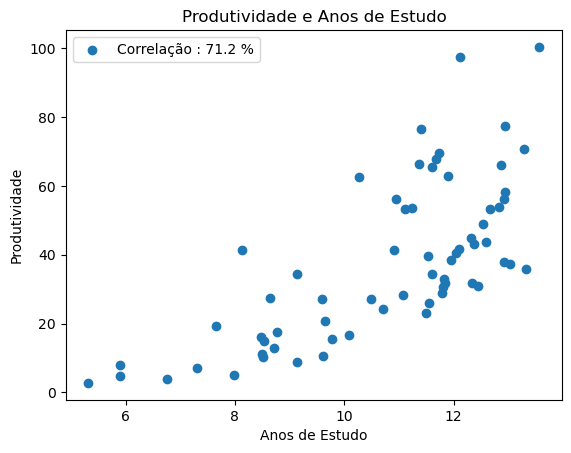

In [11]:
#Gráfico de Dispersão (Scatter Plot)

plt.scatter(dados_regressao['Anos de Estudo'], dados_regressao['Produtividade'],
            label = f"Correlação : {round(correlacao*100,1)} %")
plt.ylabel('Produtividade')
plt.xlabel('Anos de Estudo')
plt.title('Produtividade e Anos de Estudo')
plt.legend()

# Regressão Linear Simples

A análise de regressão é uma técnica estatística que busca explicar a relação de dependência entre uma variável a ser explicada (dependente) e uma ou mais variáveis explanatórias (independentes), alguns exemplos que o Woodridge traz é a relação entre produção de soja e uso de fertilizantes ou dos salários em relação a anos de estudo. A função de regressão da população (FRP) pode ser representado conforme a função abaixo: 

$
Y_i = \beta_0 + \beta_1 X_i + u_i \\
$ 

$
Y_i = \text{Variável dependente} \\[1pt]
X_i = \text{Variável independente} \\[1pt]
\beta_0 = \text{Constante ou intercepto} \\[1pt]
\beta_1 = \text{Coeficiente angular} \\[1pt]
u_i = \text{Erro}
$

O método utilizado para estimar a função de regressão da amostra (FRA) é o Método dos Mínimos Quadrados (MQQ) que busca estimar os valores de $\hat{Y}_i$ que minimizem $\sum_{} \hat{u}_i^2$. Isso será explicado melhor em diante. 

### Preparando os cálculos

Como a regressão linear buscar estabelecer uma relação linear entre as variáveis, é importante que os dados apresentem uma relação linear, entretanto pode ser caso que a nossa variável explicativa não explique a uma taxa constante (linear) a variável explicada. É razoável supor que nem toda variável crescente ou varia linearmente, como o crescimento de uma população de bactérias ou um saldo que é capitalizado a juros compostos que crescem exponencialmente, neste caso é possível encontrar uma aproximação da taxa constante de variação por meio do log natural. 

Funções Exponenciais (+ Log Natural): https://www.uel.br/projetos/matessencial/basico/medio/exponenciais.html

Como pode-se observar nos gráficos de dispersão abaixo, foi feito a transformação logarítimica da produtividade mantido inalterado os anos de estudo. Conseguimos aumentar o grau de correlação linear entre os dados e estabelecer uma melhor relação linear como veremos adiante: 

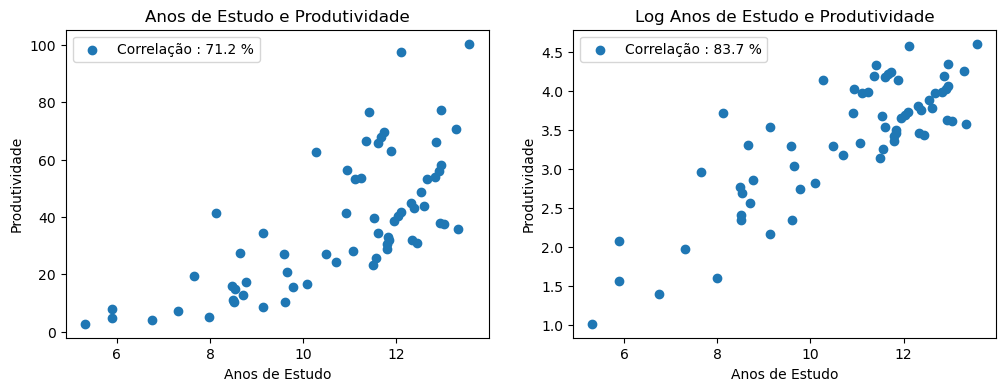

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(dados_regressao['Anos de Estudo'], dados_regressao['Produtividade'],
            label = f"Correlação : {round(correlacao*100,1)} %")
plt.ylabel('Produtividade')
plt.xlabel('Anos de Estudo')
plt.title('Anos de Estudo e Produtividade')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(dados_regressao['Anos de Estudo'], np.log(dados_regressao['Produtividade']),
            label = f"Correlação : {round(np.log(dados_regressao['Produtividade']).corr(dados_regressao['Anos de Estudo'])*100,1)} %")
plt.ylabel('Produtividade')
plt.xlabel('Anos de Estudo')
plt.title('Log Anos de Estudo e Produtividade')
plt.legend()

In [13]:
# Atribuíndo qual variável será a dependente (explicada) e a independente (explicativa)

df = dados_regressao[['Produtividade','Anos de Estudo']]

y = np.log(dados_regressao['Produtividade'])
x = dados_regressao['Anos de Estudo']

### Método dos Mínimos Quadrados

Encontrar a melhor reta de regressão significa encontrar a FRA que minimizr a $\sum_{} \hat{u}_i$ que é igual a diferença dos valores efetivamente observados e dos valores estimados da nossa variável dependente: $\sum_{} (Y_i - \hat{Y}_i)$. Entretanto, essa minimização não leva em consideração a dispersão dos erros, é possível ter uma mesma soma de erros com amplitudes diferentes, a solução é elevar ao quadrado os resíduos e somar os resultados de tal modo que o conjunto de resíduos com valores mais dispersos terão um somatório maior enquanto os com menor dispersão serão menores.

O problema então pode ser representado como: 

$min \sum_{} \hat{u}_i^2 = \sum_{} (Y_i - \hat{Y}_i)^2$.

### Equações Normais

Considerando que a FRA é igual a $\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i$, podemos substituir $\sum_{} \hat{u}_i^2 = \sum_{} (Y_i - \hat{Y}_i)^2$ por $\sum_{} \hat{u}_i^2 = \sum_{} (Y_i - \color{red}{\hat{\beta}_0 - \hat{\beta}_1 X_i})^2$. A derivada parcial em relação a $\hat{\beta}_i$ igualando a zero pode ser representada como: 

$\large \frac{\partial (\sum_{} \hat{u}_i^2)}{\partial \hat{\beta}_0}$ $= - 2 \sum_{} (Y_i - \hat{\beta}_0 - \hat{\beta}_1 X_i) = -2\sum_{} \hat{u}_i = 0$

$\large \frac{\partial (\sum_{} \hat{u}_i^2)}{\partial \hat{\beta}_1}$ $= - 2 \sum_{} (Y_i - \hat{\beta}_0 - \hat{\beta}_1 X_i) X_i = -2\sum_{} \hat{u}_i X_i = 0 $

Resolvendo $\hat{\beta}_0$:

$
\sum_{} (Y_i - \hat{\beta}_0 - \hat{\beta}_1 X_i) = 0\\
\sum_{} Y_i  - \sum_{} \hat{\beta}_0  - \sum_{} \hat{\beta}_1 X_i   = 0\\
n \hat{\beta}_0 = n \bar{Y_i}  - n \beta_i \bar{X_i}\\
\hat{\beta}_0 = \color{red}{\bar{Y_i}  - \beta_i \bar{X_i}}\\
$

Resolvendo $\hat{\beta}_1$:

$
\sum_{} (Y_i - \hat{\beta}_0 - \hat{\beta}_1 X_i) X_i = 0\\
\sum_{} Y_i X_i -  (\color{red}{\bar{Y_i}  - \beta_i \bar{X_i}}) \sum_{}  X_i -  \hat{\beta}_1 \sum_{} X_i^2  = 0\\
\sum_{} Y_i X_i - \bar{Y_i}\sum_{}  X_i  + \beta_i \bar{X_i} \sum_{}  X_i  -  \hat{\beta}_1 \sum_{} X_i^2  = 0\\
\sum_{} Y_i X_i - n \bar{Y_i} \bar{X_i}  + n \beta_i \bar{X_i} \bar{X_i}  -  \hat{\beta}_1 \sum_{} X_i^2  = 0\\
\sum_{} Y_i X_i - n \bar{Y_i} \bar{X_i} = \hat{\beta}_1 \sum_{} X_i^2 - n \hat{\beta}_i \bar{X_i} \bar{X_i}\\
\sum_{} Y_i X_i - n \bar{Y_i} \bar{X_i} = \hat{\beta}_1 (\sum_{} X_i^2 - n \bar{X_i}^2)\\
\hat{\beta}_1 = \large \frac{\sum_{} Y_i X_i - n \bar{Y_i} \bar{X_i}}{\sum_{} X_i^2 - n \bar{X_i}^2}\\
$

Link: https://are.berkeley.edu/courses/EEP118/current/section/derivation.pdf

### Coeficiente Angular

Formula para o cálculo do coeficiente angular:

$
\hat{\beta}_1 = \large \frac{\sum_{} Y_i X_i - n \bar{Y_i} \bar{X_i}}{\sum_{} X_i^2 - n \bar{X_i}^2}
$

In [14]:
b = (sum(y*x) - len(y)*y.mean()*x.mean()) / (sum(x**2)-len(x)*x.mean()**2) 
b

0.33176508832884744

### Constante

Formula para o cálculo da constante.

$
\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \cdot \bar{X} \
$

In [15]:
a = y.mean() - b*x.mean()
a

-0.18441024312445142

### Abordagem Matricial

Outra forma de calcular é pelo método matricial que se torna praticamente imperativa ao lidar com mais de uma variável explanatória (regressão linear múltipla).

$\beta = (X^TX)^{-1}X^TY$

Link: https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf

Link_2: https://online.stat.psu.edu/stat462/node/132/

In [16]:
Y_matrix = y.values
X_matrix = np.column_stack((np.ones_like(x.values), x.values))

beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y

# Imprimir os coeficientes encontrados
print("Intercepto:", round(beta[0],3))
print("Coeficiente Angular:", round(beta[1],3))

Intercepto: -0.184
Coeficiente Angular: 0.332


### Previsão

Visto que já encontramos a nossa constante $\hat{\beta}_0$ e o coeficiente angular $\hat{\beta}_1$, podemos estimar os valores de $\hat{Y}_i$ associado a cada valor observado de $X_i$ segundo o modelo de regressão que construímos. O ideal é que estejam o mais próximo possível dos valores efetivamente observados de $Y_i$.

$\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i$

In [17]:
#Cálculo da previsão

df['Previsto'] = a + b * x
df[['Produtividade','Previsto']]

,Produtividade,Previsto
0,26.997778,2.997217
1,56.053726,4.101995
2,62.702095,3.222817
3,4.034060,2.058322
4,66.488235,3.584441
...,...,...
60,41.479440,2.512840
61,53.376090,4.019053
62,70.636710,4.224748
63,27.477356,2.685358


In [ ]:
plt.figure(figsize=(12,2))

plt.plot(y, label = 'Observado')
plt.plot(df['Previsto'], label = 'Previsto')
plt.title("Produtividade observada e prevista")
plt.xlabel('Observação')
plt.ylabel('ln (Produtividade)')
plt.legend()
plt.show()

### Resíduos

O erro $u_i$ é simplesmente a diferença do valor previsto $\hat{Y}_i$ em relação aos valores efetivamente observados de $Y_i$, representa os resíduos que não são explicados pelo modelo de regressão. A ideia de utilizar o MQO (Mínimos Quadrados Ordinários) é encontrar a FRA (Função de Regressão Amostral) que minimize $\sum_{} \hat{u}_i^2$. Matematicamente pode ser expresso da seguinte forma: 

$\hat{u}_i = Y_i - \hat{Y_i}$

O modelo clássico de regressão linear pressupõe que os termos de erro $\hat{u}_i$ são não-correlacionados com variável explicativa, isso é um pressuposto importante pois se queremos um modelo que possa ser generalizado ele não pode depender dos coeficientes estimados. No Estatística Básica do Bussab e Morettin (2005) sugere-se plotar em um gráfico de dispersão os resíduos e no gráfico Q-Q para visualizar se respeitam a hipótese de normalidade:

In [19]:
#Cálculo dos resíduos

df['Residuos'] = y - df['Previsto']
df['Residuos']

0     0.298538
1    -0.075684
2     0.915578
3    -0.663548
4     0.612584
        ...   
60    1.212358
61   -0.041691
62    0.032802
63    0.628004
64   -0.867691
Name: Residuos, Length: 65, dtype: float64

Correlação entre resíduos defasados -0.13856094174082356
Média dos resíduos -3.0403030520504287e-16


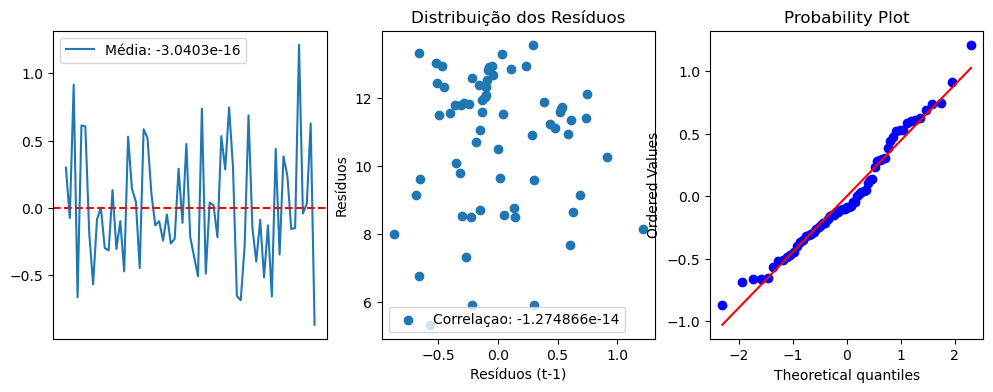

In [20]:
plt.figure(figsize=(12,4))

#Gráfico variação dos resíduos
plt.subplot(1,3,1)
plt.plot(df['Residuos'], label = f"Média: {round(df['Residuos'].mean(),20)}")
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks([])
plt.legend()

#Gráfico de Dispersão dos Resíduos
plt.subplot(1,3,2)
plt.scatter(df['Residuos'], x, label = f"Correlaçao: {round(df['Residuos'].corr(x),20)}")
plt.ylabel('Resíduos')
plt.xlabel('Resíduos (t-1)')
plt.title('Distribuição dos Resíduos')
plt.legend()

#Gráfico Q-Q
plt.subplot(1,3,3)
stats.probplot(df['Residuos'], dist="norm", fit =True, plot=pylab);

print(f"Correlação entre resíduos defasados {df['Residuos'].corr(df['Residuos'].shift(1))}")
print(f"Média dos resíduos {df['Residuos'].mean()}")

### Teste d de Durbin-Watson

O teste mais famoso indicado pelo Gujarati para avaliar se há autocorrelação entre os termos de erro é o teste d de Durbin-Watson que fornece valores que vão de 0 à 4 e quanto mais próximo de 2 indica que não há correlação. 

$
d = \large \frac{\sum_{i=2}^{n} (u_i - u_{i-1})^2}{\sum_{i=1}^{n} u_i^2}
$

In [21]:
df['Residuos']-df['Residuos'].shift(1)

# Teste d de Durbin-Watson
estatistica_dw = sum(((df['Residuos']-df['Residuos'].shift(1)).dropna())**2) / sum(df['Residuos']**2)
print(f"Teste d de Durbin-Watson {estatistica_dw}")

Teste d de Durbin-Watson 2.2007886493596103


## Coeficiente de Determinação - R2

É uma medida estatística que mede o quão bem os resultados da FRA se ajustam aos valores observados da variável dependente observada $Y_i$, também pode ser chamado de qualidade de ajuste. Um caso hipotético seria onde todos os valores estimados da variável dependente fossem iguais aos valores observados ($Y_i = \hat{Y}_i$), neste caso não haveria resíduos ($SQRes= 0$) e o coeficiente de determinação $R^2$ seria igual a 1.

$
R^2 = 1 - \large \frac{SQRes}{SQReg}
$

In [22]:
#Soma dos Quadrados dos Resíduos
SQRes = sum(df['Residuos']**2)

#Soma dos Quadrados Totais
SQReg = sum((y-y.mean())**2)

#Cálculo do Coeficiente de Determinação
r2 = 1 - SQRes/SQReg
round(r2,4)

0.7007

# Problemas de Inferência

A inferência estatística é o campo na estatística que estuda como é possível a partir de uma amostra (parte) inferir algo sobre a população (todo). A inferência se faz necessária pois muitas vezes é impossível ou muito custoso coletar informação sobre toda a população enquanto é possível dado uma amostra suficiente boa inferir com confiança algo da população, um exemplo típico são as pesquisas eleitorais.

Uma vez obtida uma amostra, podemos a partir dela gerar informações tais como sua média, desvio-padrão ou no caso de um modelo de regressão estimar os parâmetros de uma função de regressão amostral (FRA). Na nossa função de regressão encontramos valores pontuais para os nossos parâmetros estimados ($\hat{\beta}_1$), entretanto não leva em consideração o possível erro desta estimação, ou seja, o parâmetro estimado pode ser diferente do valor inicialmente encontrado. A forma para mensurar essa "margem de erro" é por meio do intervalo de confiança:

### Intervalo de Confiança

O intervalo de confiança representa os limites de valores que contém os coeficiente estimado $\hat{\beta}_i$ sob um nível de significância ($\alpha$) onde espera-se que ($1 - \alpha$) dos valores do coeficiente estariam distribuídos dentro deste limite. Para ilustar, considere os retornos de um ativo com média $\bar{x} = 0$ e desvio-padrão $\sigma = 1$, no limite espera-se que com 95% de confiança a média $\bar{x} = 0$ esteja entre mais ou menos -2 e 2 desvios-padrões ($\sigma$) assumindo que os dados estejam normalmente distribuídos. 

### Erro Padrão do Estimador

O erro padrão ($ep$) dos estimadores é utilizado para medir a sua confiabilidade, quanto menor o erro padrão ($ep$) menor será a probabilidade de ter obtido um estimador diferente dos coeficientes verdadeiros da população. O calculo dos estimadores segue a fórmula abaixo: 

$ ep(\hat{\beta}_1) = \large \sqrt{\frac{\sum_{i=1}^{n} \varepsilon_i^2}{(n-2) \sum_{i=1}^{n} (x_i - \bar{x})^2}} $

$ ep(\hat{\beta}_0) = ep(\hat{\beta}_1) \cdot \large \sqrt{\frac{\sum_{i=1}^{n} x_i^2}{n}}$

In [23]:
#Calculo do erro padrão do resíduo

s = (sum(df['Residuos']**2) / (len(df)-2))**0.5
s

0.4453303880172949

In [24]:
#Calculo do erro padrão do coeficiente angular

sb = s / (sum((x-x.mean())**2))**0.5
sb

0.02732027602409967

In [25]:
#Calculo do erro padrão da constante

sa = sb * (sum(x**2)/len(df))**(0.5)
sa

0.2985736460470097

### Intervalo de Confiança dos Estimadores

Com os erros padrões calculados, o intervalo de confiança para uma distribuição do tipo $t$ de student pode ser calculado como: 

$
\text{Intervalo de Confiança} = \hat{\beta}_i \pm t_{\alpha / 2} \cdot {ep(\hat{\beta}_i)} \\
$

$ 
\hat{\beta}_i = \text{Coeficiente estimado} \\
t_{\alpha / 2} = \text{t crítico para um nível de significância }\alpha\\
ep = \text{Desvio (erro) padrão do estimador}
$

In [26]:
#Cálculo do Intervalo de Confiança

from scipy.stats import t

# Graus de Liberdade
num_coef = 2
tamanho_amostra = len(df)
graus_de_liberdade = tamanho_amostra - num_coef
media = 0

# Nível de significância escolhido
nivel_significancia = 0.05

# Calculo do intervalo do t crítico considerando uma distribuição t de student
t_critico = t.ppf(1 - nivel_significancia/2, graus_de_liberdade)

# Calculo do intervalo de confiança
ic_inferior = b - b * t_critico * sb
ic_superior = b + b * t_critico * sb

print(f"Limite Inferior: {round(ic_inferior,3)} \nLimite Superior: {round(ic_superior,3)}")
print(f"Nível de Significância: {nivel_significancia*100} %")

Limite Inferior: 0.314 
Limite Superior: 0.35
Nível de Significância: 5.0 %


### Teste T

O teste t é um teste estatístico utilizado quando a variância da população é desconhecida, a distribuição $t$ de student tende a ter caudas um pouco mais "gordas" do que a distribuição normal. Calcula-se o teste t para os coeficientes estimados ($\hat{\beta}_i$) que serão posteriormente utilizados nos testes de hipóteses:

$
t = \large \frac {\hat{\beta}_i}{ep(\hat{\beta}_i)}\\[10pt]
$

$ 
\hat{\beta}_i = \text{Coeficiente estimado} \\[0pt]
ep(\hat{\beta}_i) = \text{Erro) padrão do estimador}
$

Associado ao teste t encontrado, há uma probabilidade de obter este valor em uma distribuição do tipo $t$ de student com $n$ graus de liberdade.

### Teste de Hipótese

Segundo Gujarati, na linguagem dos testes de significância, uma estatística é dita significativa se o valor do teste estatístico situar-se na região crítica, neste caso, a hipótese nula é rejeitada. Ao calcular o teste t, verifica-se se ele se encontra dentro ou fora do intervalo de confiança, caso ele esteja fora do intervalo então podemos rejeitar a hipótese nula $H_0$ de que o estimador é igual a zero e aceitar a hipótese alternativa $H_1$ de que ele é diferente de zero. 

$
H_0: \hat{\beta}_1 = 0 \\
H_1: \hat{\beta}_1 \neq 0
$

Uma hipótese muito importante de ser testada é que $ H_0: \hat{\beta}_i = 0 $, caso rejeite esta hipótese nula então pode-se afirmar que o coeficiente estimado tem alguma relação significativa com a variável dependente $Y_i$. A forma de fazer isso é relativamente simples, ao calcular o teste t, verifica-se o valor encontrado dentro de uma distribuição $t$ de student com $n$ graus de liberdade, caso a probabilidade de obter este valor seja menor que o nível de significância escolhido, então rejeita-se a hipótese nula. 

Distribuição t de Student: https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_t_de_Student 

Teste t de Student: https://pt.wikipedia.org/wiki/Teste_t_de_Student

In [27]:
t_angular = b/sb
t_constante = a/sa

print(t_angular)
print(t_constante)

12.143548185098567
-0.6176373754548199


In [28]:
graus_de_liberdade

63

In [29]:
# O cálculo da probabilidade dos testes t podem ser calculadas conforme funções abaixo: 

p_value_constante = stats.t.sf(-t_constante, graus_de_liberdade)*2
p_value_angular = stats.t.sf(t_angular, graus_de_liberdade)*2

print(f"A probabilidade de obter de obter um valor t de {round(t_constante,3)} é de {p_value_constante}.")
print(f"A probabilidade de obter de obter um valor t de {round(t_angular,3)} é de {p_value_angular}.")

A probabilidade de obter de obter um valor t de -0.618 é de 0.539040624719575.
A probabilidade de obter de obter um valor t de 12.144 é de 3.749665041013005e-18.


### Teste F

Outro teste que pode ser feito é o teste F que permite avaliar se o modelo de regressão é significativo globalmente. Ele compara a variança explicada pelo modelo (SQreg) com a não explicada pelo modelo (SQRes) e associa um valor-p ao resultado.

$F = \large \frac{SQReg - SQRes}{SQRes / (n - p - 1)}$

$
SQReg = \text{Soma do Quadrado da Regressão} \\
SQRes = \text{Soma do Quadrado dos Resíduos} \\
p = \text{Número de parâmetros} \\
n = \text{Número de observações} \\
$

In [30]:
F = (SQReg-SQRes)/(SQRes/(tamanho_amostra-2))
F

147.46576252380828

In [31]:
p_value_f = stats.f.sf(F, 1, graus_de_liberdade)
print(f"A probabilidade de obter de obter um valor f de {round(F,2)} é de {p_value_f}")

A probabilidade de obter de obter um valor f de 147.47 é de 3.7496650410143925e-18


## Resultado Final

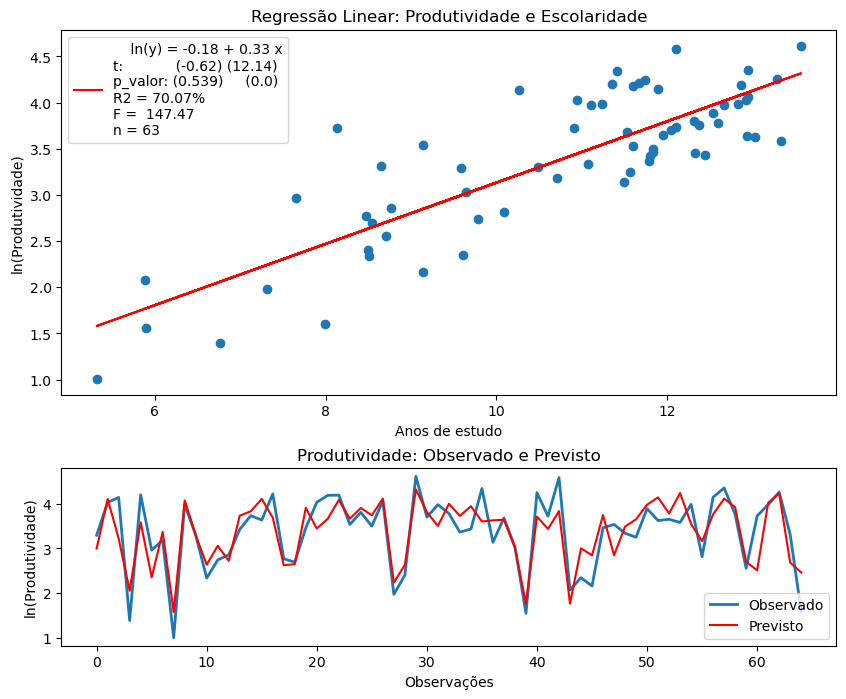

In [38]:
fig = plt.figure(figsize=(10,8))

gs = fig.add_gridspec(nrows = 10, ncols = 1)

ax1 = fig.add_subplot(gs[0:6, 0])
ax2 = fig.add_subplot(gs[7:10, 0])

#Gráfico de Dispersão
ax1.set_title('Regressão Linear: Produtividade e Escolaridade')
ax1.scatter(x, y)

#Reta de Regressão
ax1.plot(x, df['Previsto'], color = 'red', 
         label = f"    ln(y) = {round(a,2)} + {round(b,2)} x"+
         f"\nt:            ({round(t_constante,2)}) ({round(t_angular,2)})"+
         f"\np_valor: ({round(p_value_constante,4)})     ({round(p_value_angular,4)})"+
         f"\nR2 = {round(r2*100,2)}%\nF =  {round(F,2)}\nn = {graus_de_liberdade}")
ax1.set_ylabel('ln(Produtividade)')
ax1.set_xlabel('Anos de estudo')
ax1.legend()

#Gráfico da Previsão
ax2.set_title('Produtividade: Observado e Previsto')
ax2.plot(y, label = 'Observado', linewidth=2)
ax2.plot(df['Previsto'], label = 'Previsto', c ='red', linewidth=1.5)
ax2.set_xlabel('Observações')
ax2.set_ylabel('ln(Produtividade)')
ax2.legend()

### Validação dos Dados com Statsmodels

Podemos agora comparar os resultados calculados manualmente com que obteríamos utilizando uma biblioteca como a statmodels.

In [34]:
X = sm.add_constant(x)
modelo = sm.OLS(y, X)
resultados = modelo.fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Produtividade   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     147.5
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           3.75e-18
Time:                        15:31:16   Log-Likelihood:                -38.634
No. Observations:                  65   AIC:                             81.27
Df Residuals:                      63   BIC:                             85.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1844      0.299     -0.618      0.539      -0.781       0.412
Anos de Estudo     0.3318      0.027     12.144      0.000       0.277       0.386
==============================================================================
Omnibus:                        2.496   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                2.432
Skew:                           0.448   Prob(JB):                        0.296
Kurtosis:                       2.693   Cond. No.                         59.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""